In [105]:
import pandas as pd
import numpy as np


In [106]:
users = pd.read_csv('/Users/parisahojjatnia/Documents/Python/relax_challenge/takehome_users.csv', encoding='latin-1',parse_dates=True)
engage = pd.read_csv('/Users/parisahojjatnia/Documents/Python/relax_challenge/takehome_user_engagement.csv', parse_dates=True)


In [107]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [108]:
engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


# Defining an "adopted user" as a user who has logged into the product on three separate days in at least one sevenday period , identify which factors predict future user adoption.








In [109]:
import datetime

#conver time_stamp to datetime and the set it as the index
engage.time_stamp = pd.to_datetime(engage.time_stamp)
engage = engage.set_index('time_stamp', drop= True)

In [110]:
from datetime import timedelta

def label_adopted(x):    
    "takes a users input and returns whether or not they have been active within any 7-day period"
    df_temp = engage.loc[engage['user_id'] == x] #select out rows of this user
    df_temp = df_temp.resample('D').mean().dropna() #resample to show if active in a day. .mean() is just of 1
    adopted = 0
    for i in range(len(df_temp)-2): #loop over active days till the second to last day
        if df_temp.index[i + 2] - df_temp.index[i] <= timedelta(days=7): # difference between every 1st and 3rd day
            adopted = 1
            break
        else:
            adopted = 0
    return adopted

In [111]:
users['adopted_user'] = users['object_id'].apply(label_adopted)

In [112]:
print(sum(users['adopted_user']))


1656


In [113]:
#conver time_stamp to datetime
users.creation_time = pd.to_datetime(users.creation_time)
users['last_session_creation_time'] = users['last_session_creation_time'].map(lambda data: 
                                    datetime.datetime.fromtimestamp(int(data)).strftime('%Y-%m-%d %H:%M:%S'),
                                                                              na_action='ignore')

In [114]:
# define a useful feature called usage length as the difference between creation time and last session:

users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'])
users['usage_length'] = users['last_session_creation_time'] - users['creation_time']
users['usage_length'] = users['usage_length'].dt.days

In [115]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,usage_length
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-21 20:53:30,1,0,11,10803.0,0,-1.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-30 20:45:04,0,0,1,316.0,1,135.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 16:14:52,0,0,94,1525.0,0,-1.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 01:09:28,0,0,1,5151.0,0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 02:14:20,0,0,193,5240.0,0,4.0


In [116]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 12 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
adopted_user                  12000 non-null int64
usage_length                  8823 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(5), object(3)
memory usage: 1.1+ MB


In [117]:
users['email_provider'] = [x.split('@')[1] for x in users.email]#select out the domain
top_emails = users.email_provider.value_counts().index[:6]
users.invited_by_user_id = users.invited_by_user_id.fillna(0)
#label anything not in the top 5 as other
users['email_provider'] = [x if x in top_emails else 'other' for x in users.email_provider]


In [119]:
feature_df = users.iloc[:,4:]
feature_df = feature_df.drop('last_session_creation_time', axis=1)
feature_df['usage_length'] = feature_df['usage_length'].fillna(0)


converting categorical labels into categorical features:

In [120]:
from sklearn.preprocessing import LabelEncoder

gle = LabelEncoder()
creation_labels = gle.fit_transform(users['creation_source'])
feature_df.creation_source = creation_labels

org_id_labels = gle.fit_transform(users['org_id'])
feature_df.org_id = org_id_labels

invited_labels = gle.fit_transform(users['invited_by_user_id'])
feature_df.org_id = invited_labels

email_labels = gle.fit_transform(users['email_provider'])
feature_df.email_provider = email_labels

In [121]:
feature_df.head()


,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,usage_length,email_provider
0,0,1,0,2325,10803.0,0,-1.0,6
1,1,0,0,56,316.0,1,135.0,2
2,1,0,0,298,1525.0,0,-1.0,2
3,0,0,0,1104,5151.0,0,0.0,6
4,0,0,0,1127,5240.0,0,4.0,6


In [136]:
from sklearn.model_selection import train_test_split

data = feature_df.drop('adopted_user', axis=1)
labels = feature_df.adopted_user

X_train, y_train, X_test, y_test = train_test_split(data, labels, test_size=0.33, random_state=42)

Since we have a mix of categorical and numerical data,we will use  RandomForestClassifier. 

In [141]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42, class_weight='balanced')

clf.fit(X_train, X_test)

clf.score(y_train, y_test)
print('Accuracy of test set was', clf.score(y_train, y_test))

Accuracy of test set was 0.9709595959595959


In [139]:
from sklearn.metrics import classification_report

y_pred = clf.predict(y_train)

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3407
           1       0.91      0.88      0.89       553

    accuracy                           0.97      3960
   macro avg       0.95      0.93      0.94      3960
weighted avg       0.97      0.97      0.97      3960



In [127]:
## take a look at feature importance

feature_importance = pd.DataFrame()
feature_importance['coef'] = rf.feature_importances_
feature_importance = feature_importance.set_index(data.columns)
feature_importance.coef.nlargest(10)

usage_length                  0.922983
org_id                        0.022772
invited_by_user_id            0.021117
email_provider                0.015168
creation_source               0.011305
opted_in_to_mailing_list      0.003423
enabled_for_marketing_drip    0.003233
Name: coef, dtype: float64

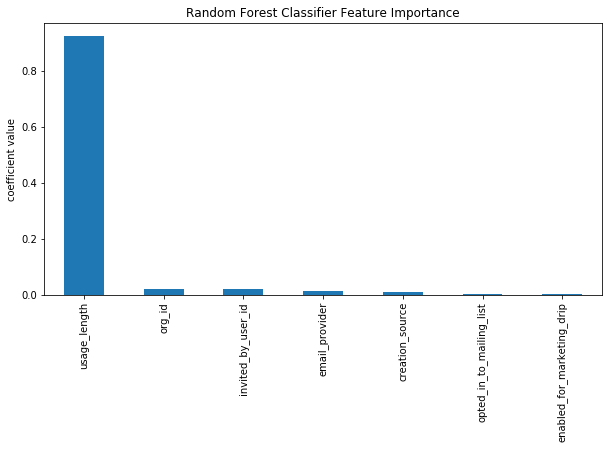

In [129]:
#plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
(feature_importance['coef']).nlargest(10).plot(kind='bar', x=feature_importance.index)
plt.title('Random Forest Classifier Feature Importance')
plt.ylabel('coefficient value')
plt.show()

According to this analysis, RandomForestClassifer identified the most important feature in becoming an adaptive user is how long doea it take between when a user signed up and when their last active session. 
In order to grow adaptive user is to encourage existing users to log in again after a while.
The next important eature is inviting by user, so if we encourage users to invite friends that would be effective too.